0.8
computing velocities
    finished (0:00:00) --> added 
    'steady_state_velocity', velocity vectors for each individual cell (adata.layers)
or is corrupted (e.g. due to subsetting). Consider recomputing with `pp.neighbors`.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing velocity graph (using 1/48 cores)


  0%|          | 0/2250 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'steady_state_velocity_graph', sparse matrix with cosine correlations (adata.uns)
recovering dynamics (using 30/48 cores)


  0%|          | 0/1000 [00:00<?, ?gene/s]

    finished (0:01:40) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:07) --> added 
    'dynamical_velocity', velocity vectors for each individual cell (adata.layers)
0
100
200
300
400
500
600
700
800
900
running scv analysis
0.8
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


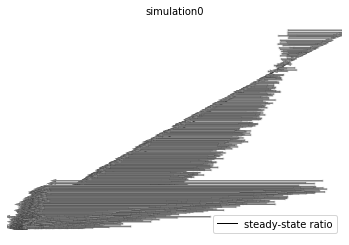

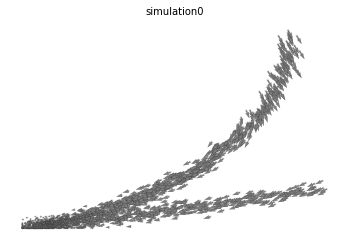

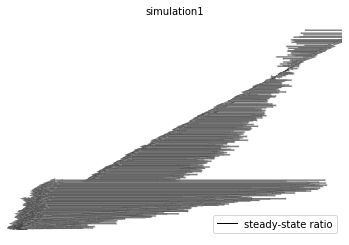

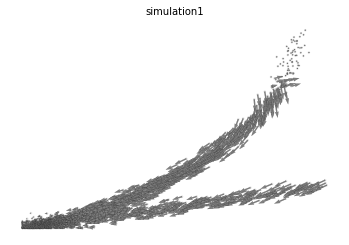

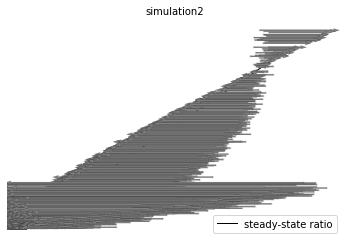

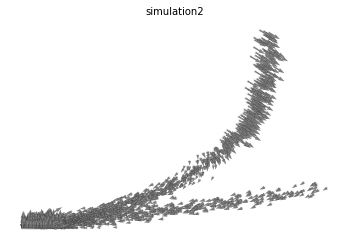

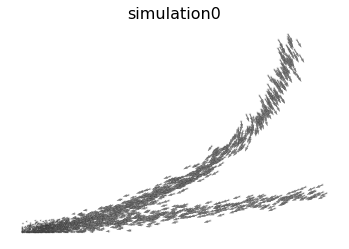

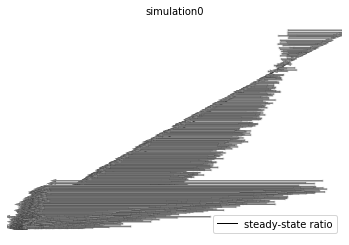

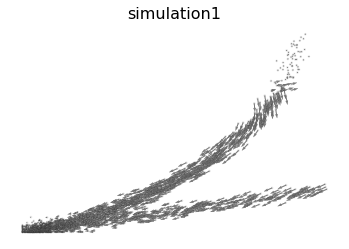

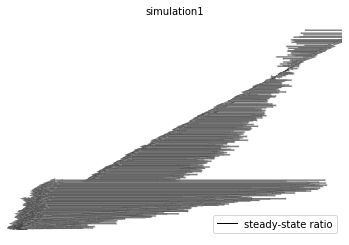

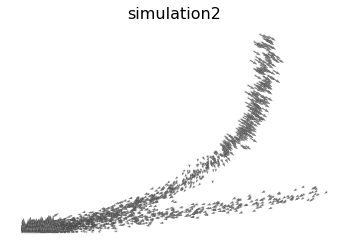

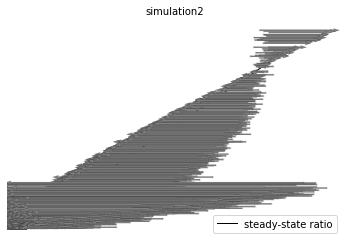

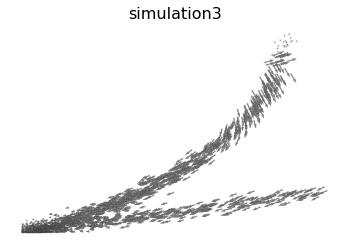

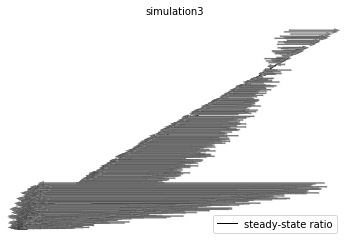

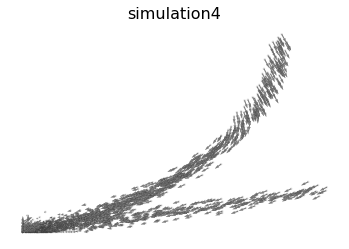

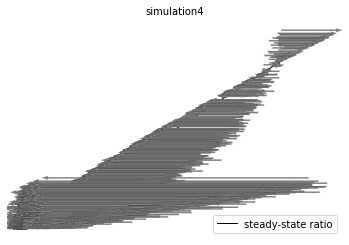

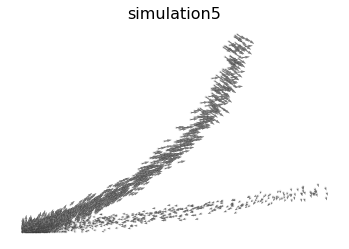

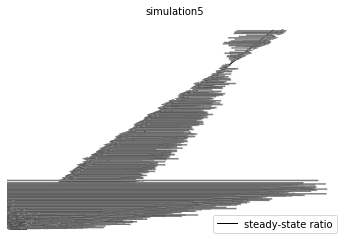

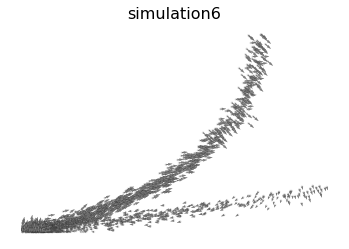

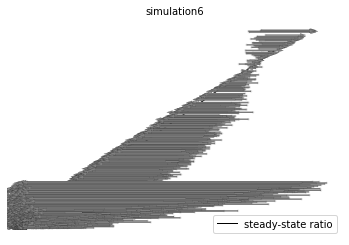

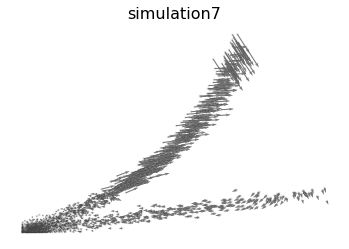

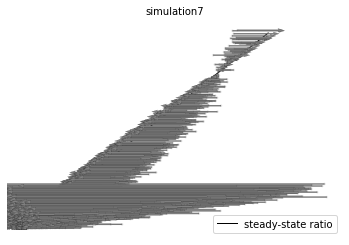

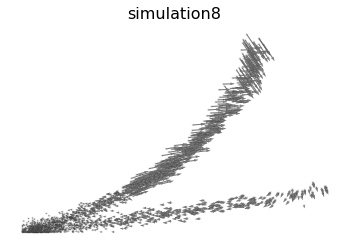

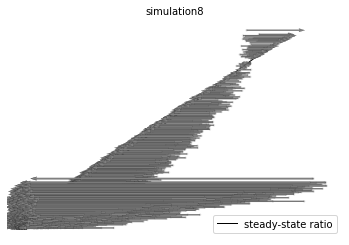

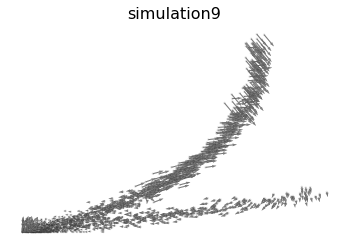

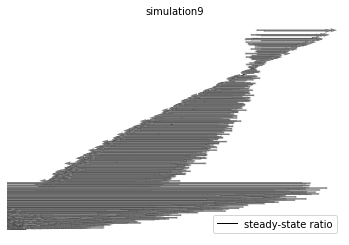

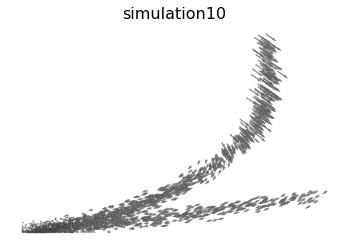

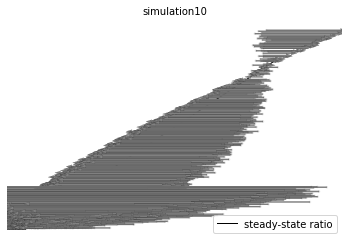

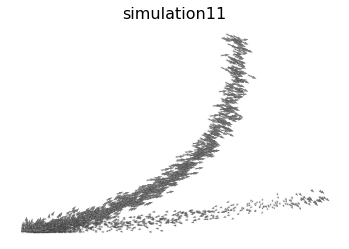

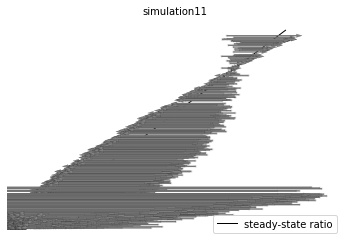

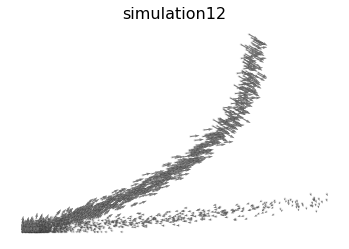

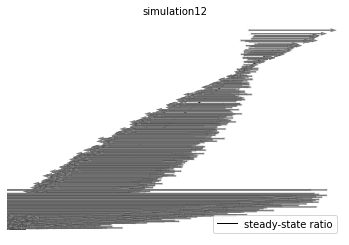

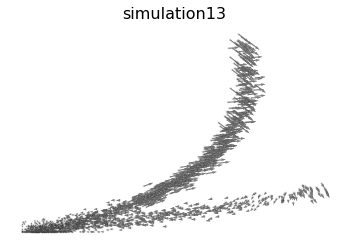

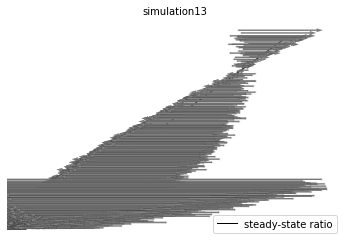

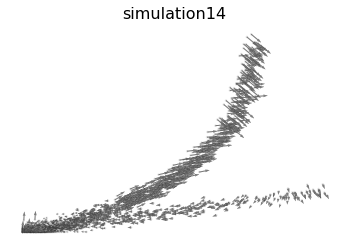

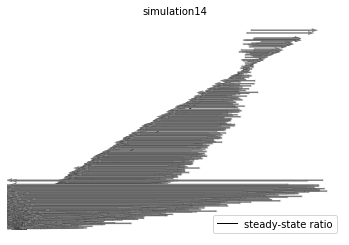

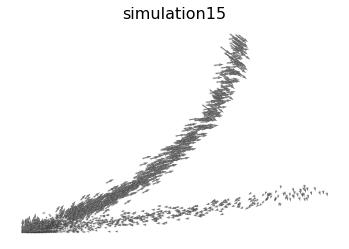

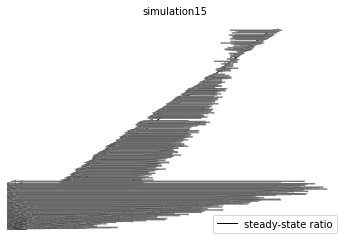

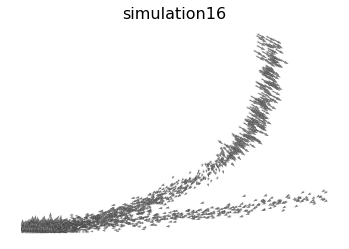

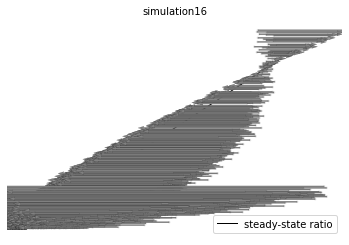

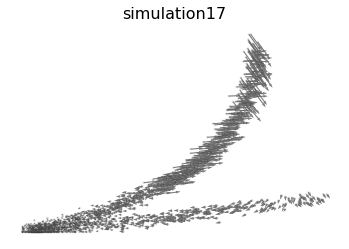

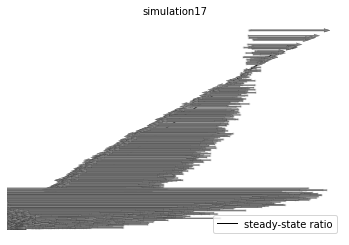

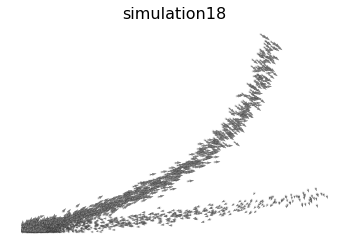

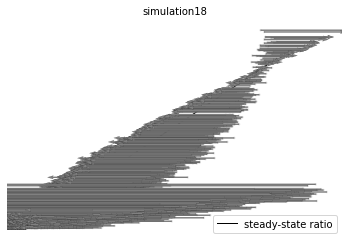

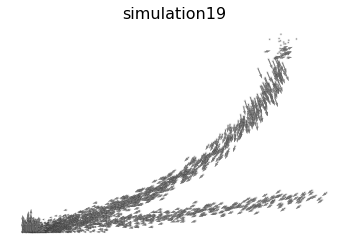

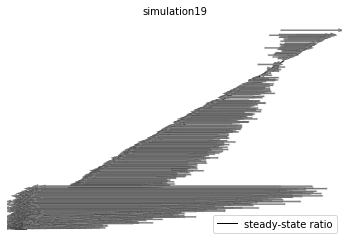

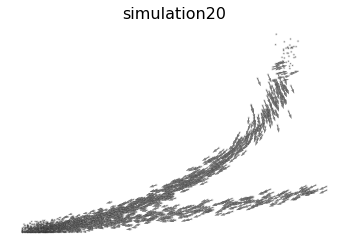

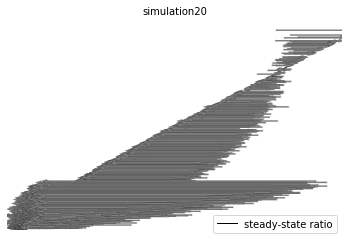

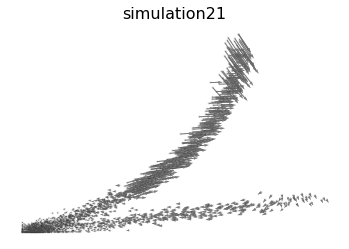

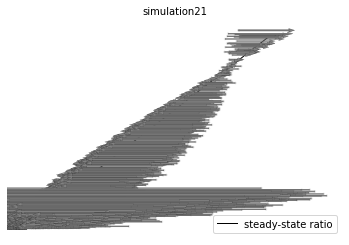

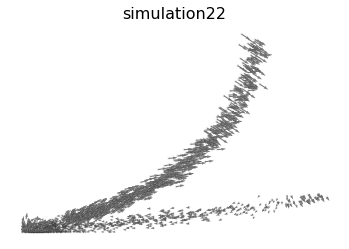

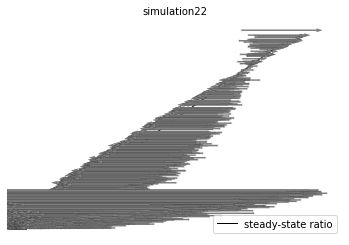

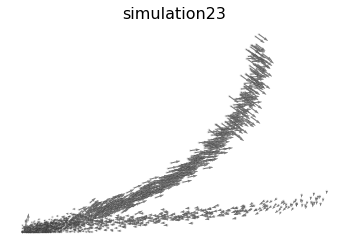

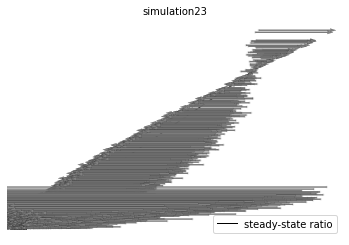

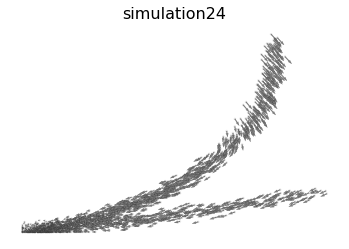

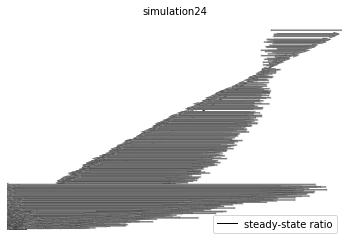

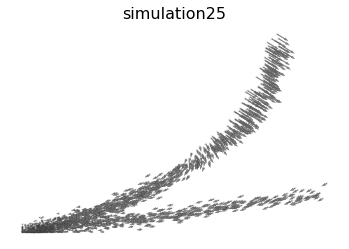

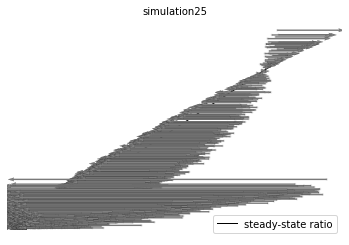

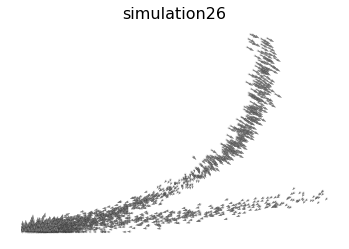

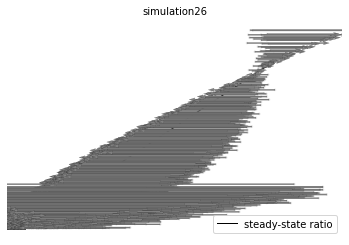

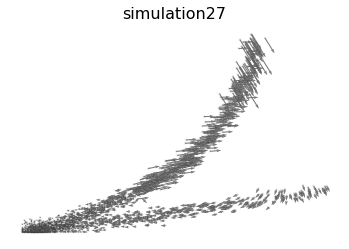

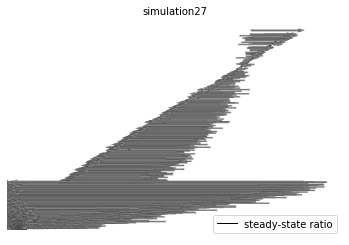

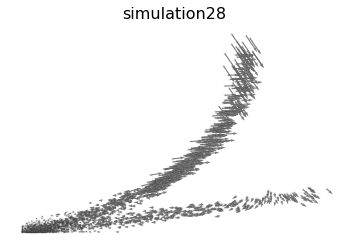

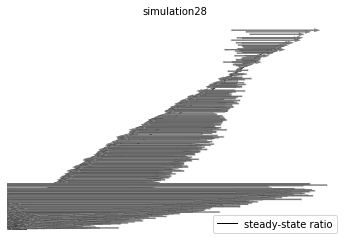

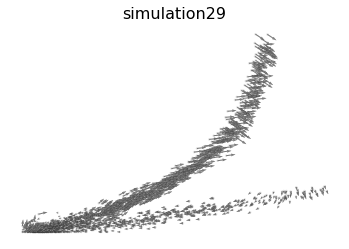

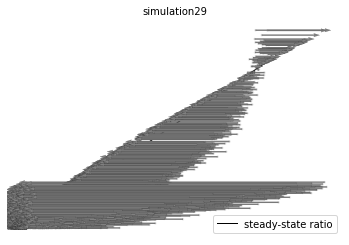

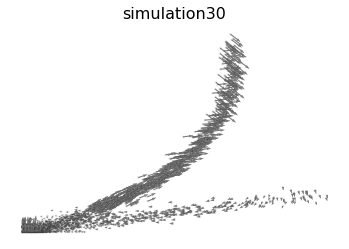

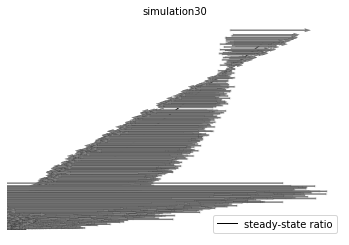

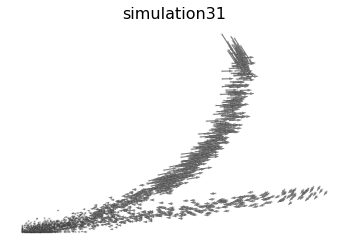

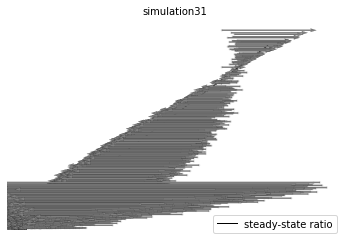

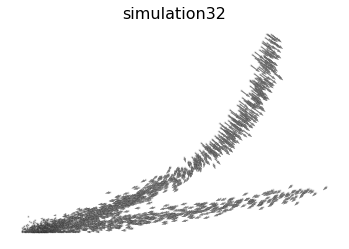

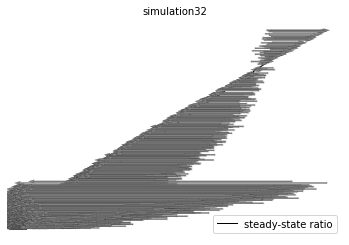

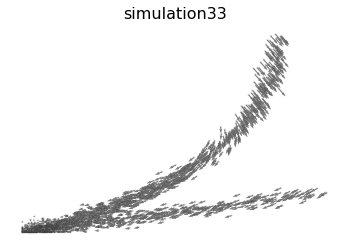

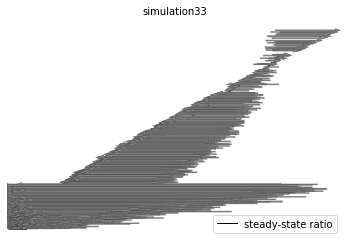

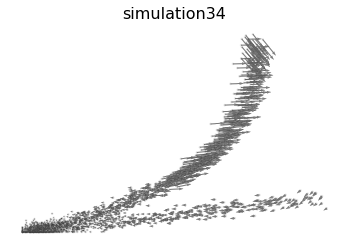

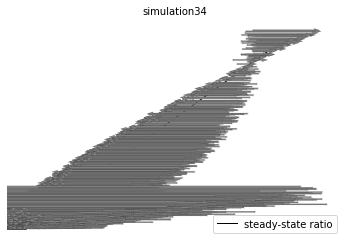

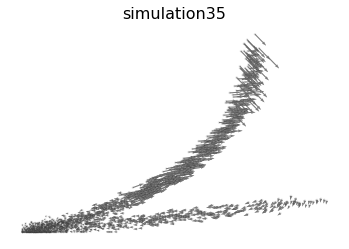

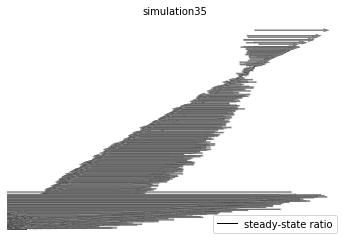

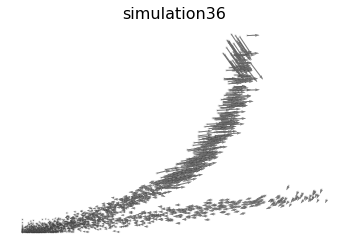

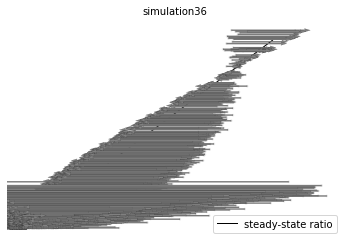

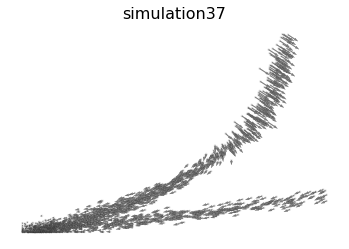

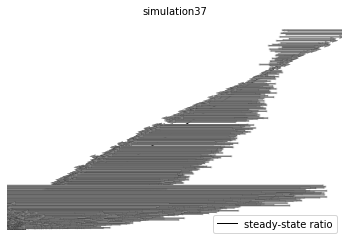

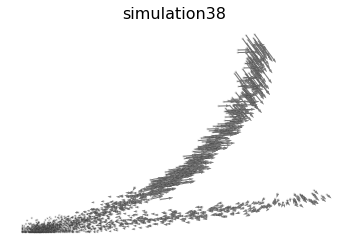

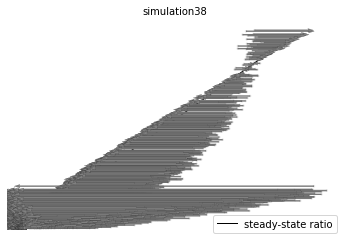

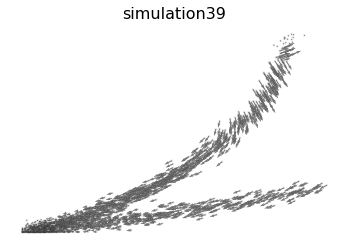

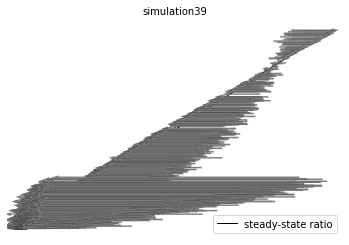

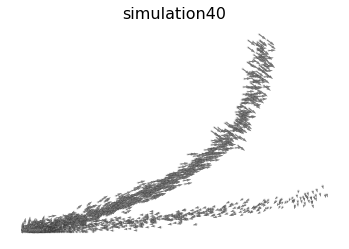

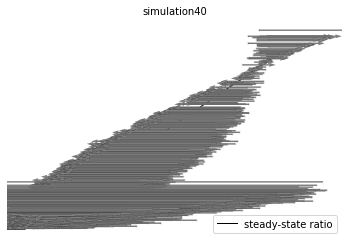

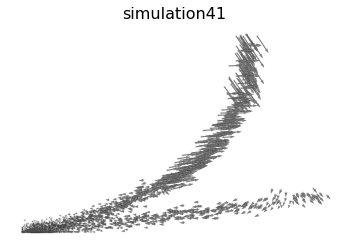

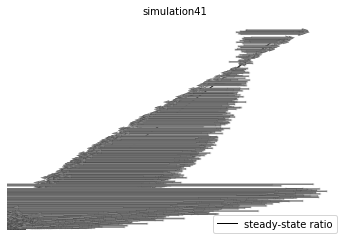

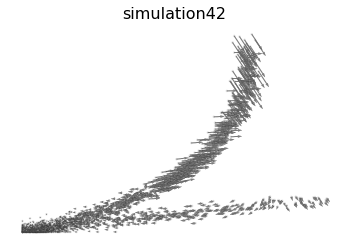

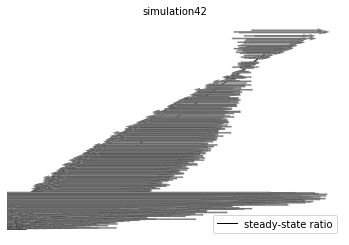

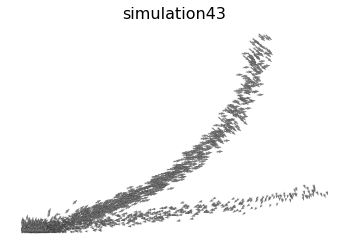

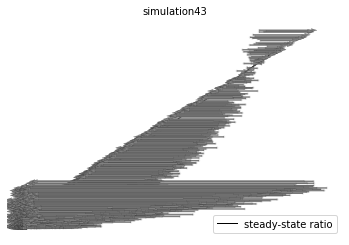

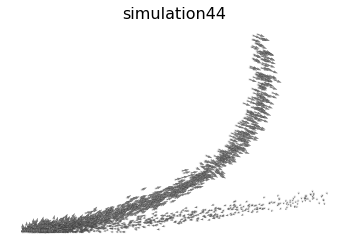

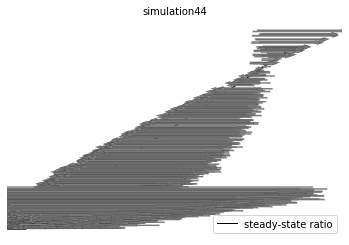

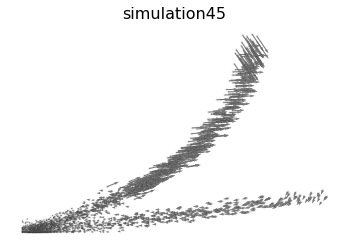

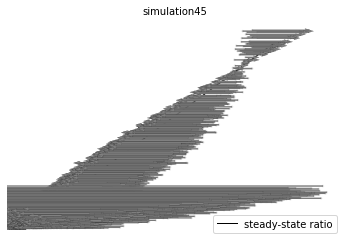

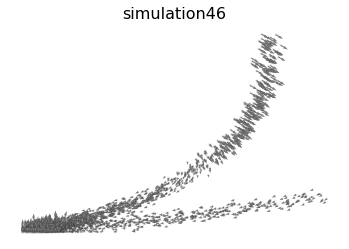

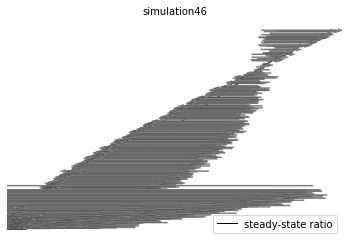

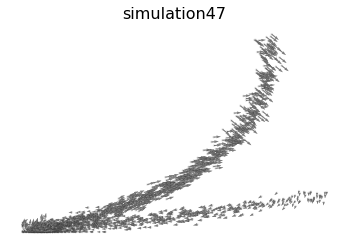

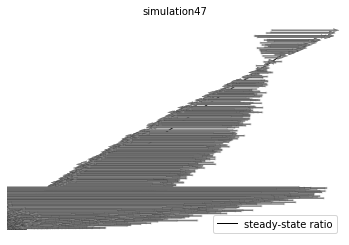

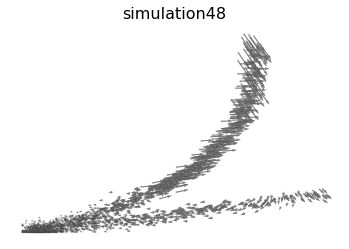

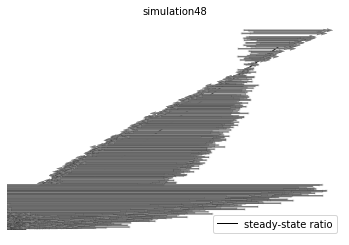

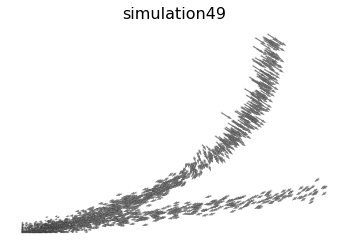

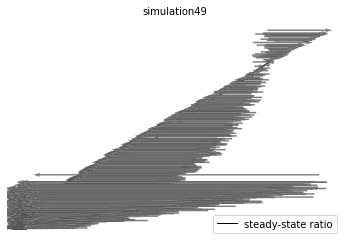

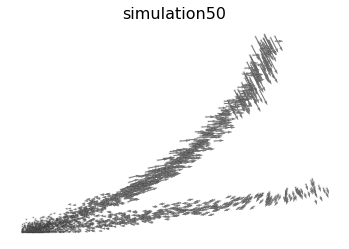

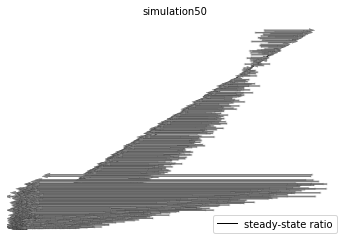

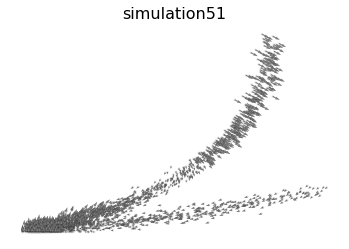

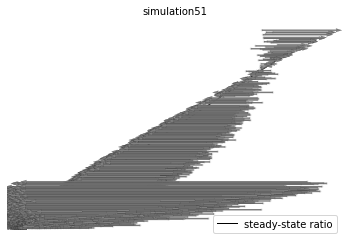

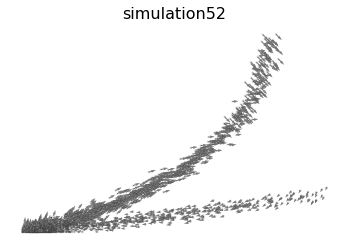

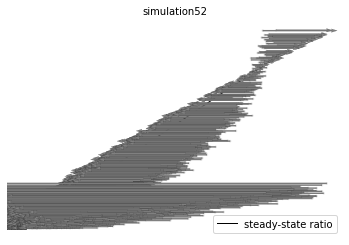

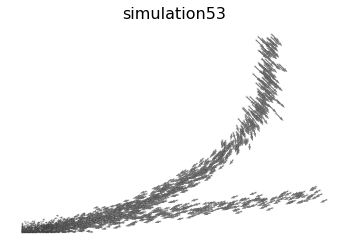

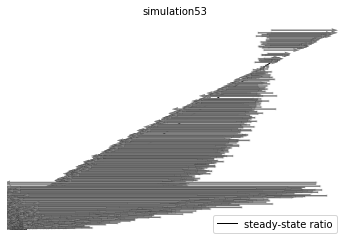

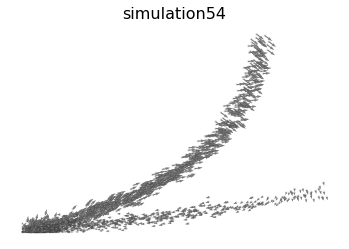

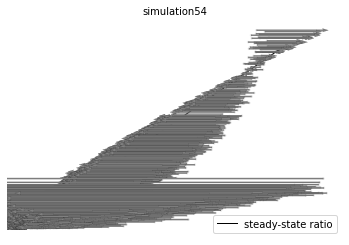

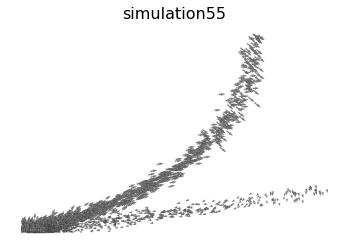

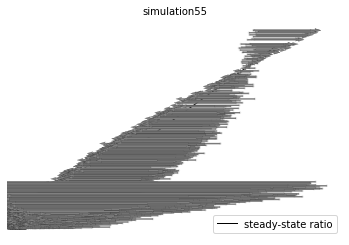

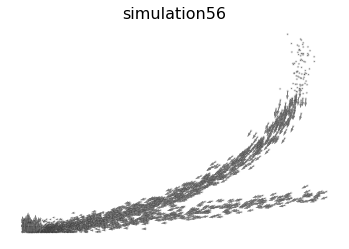

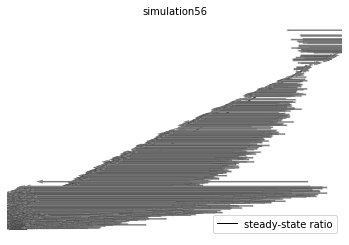

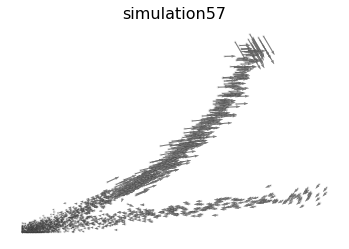

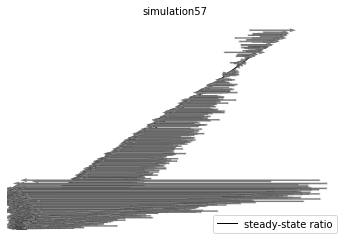

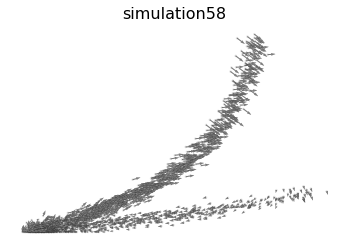

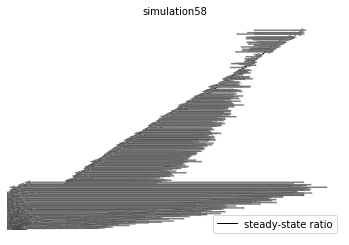

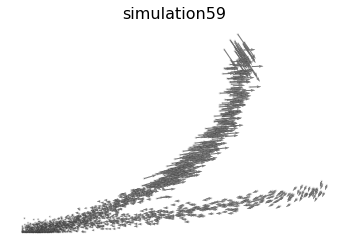

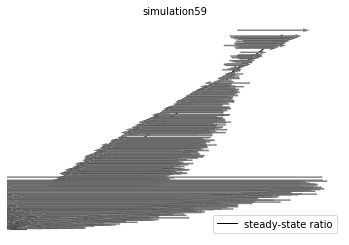

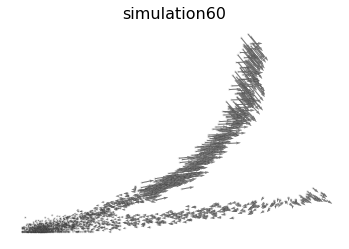

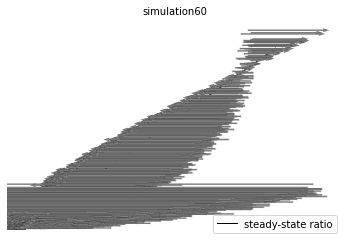

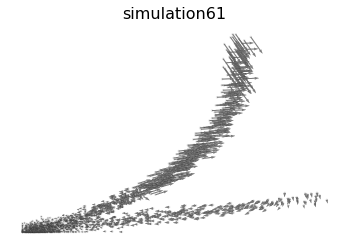

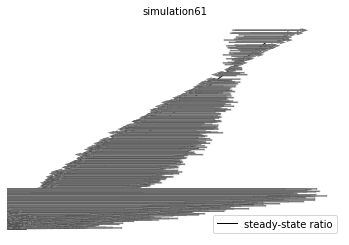

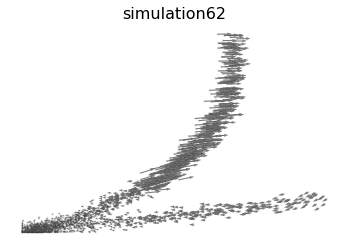

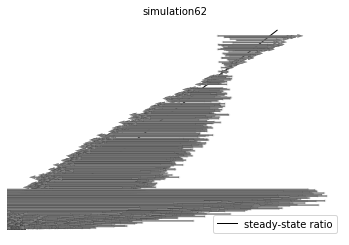

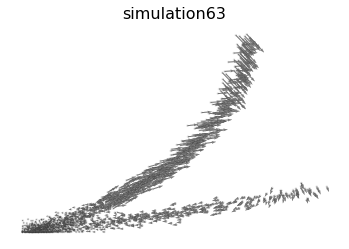

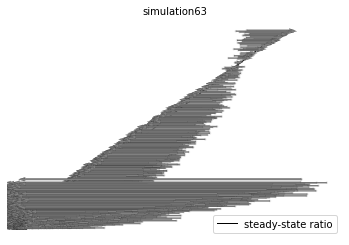

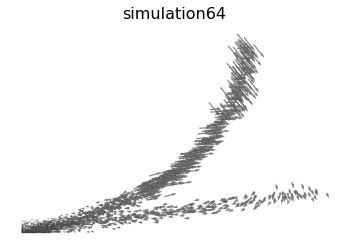

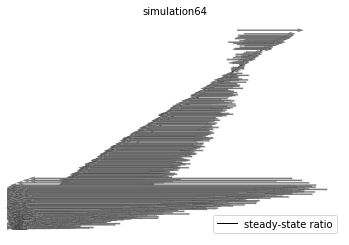

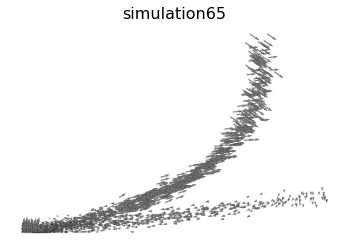

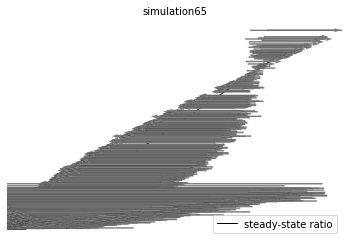

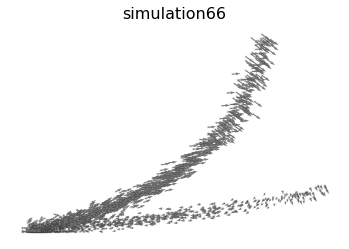

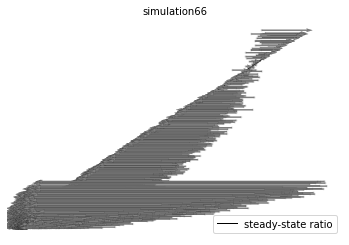

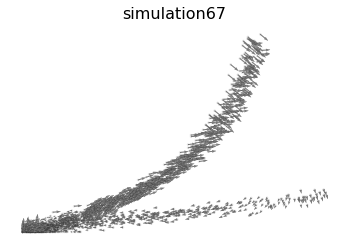

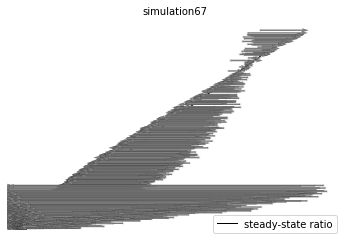

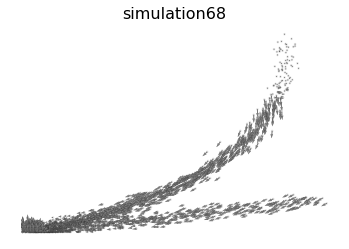

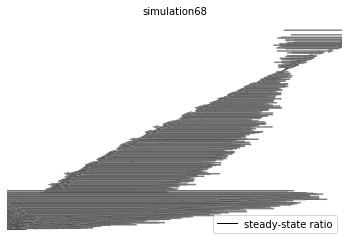

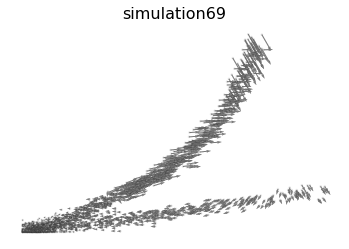

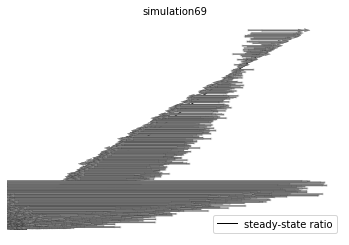

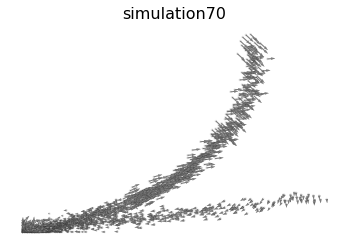

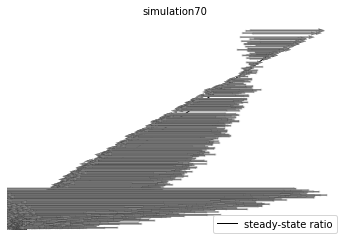

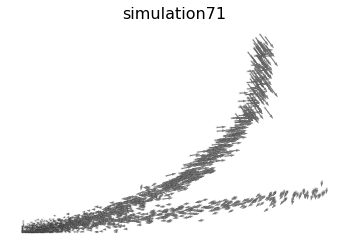

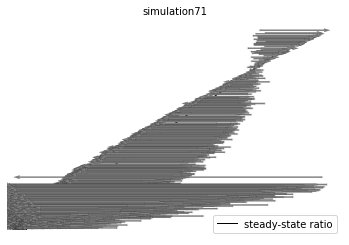

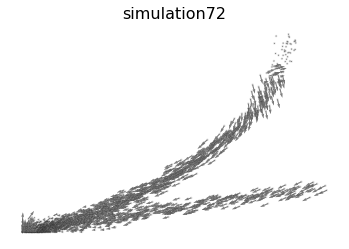

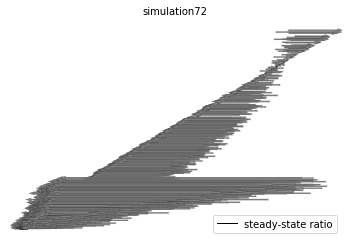

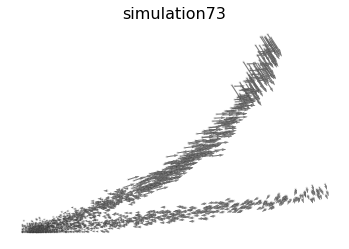

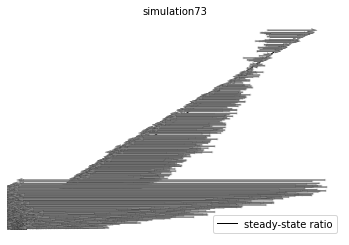

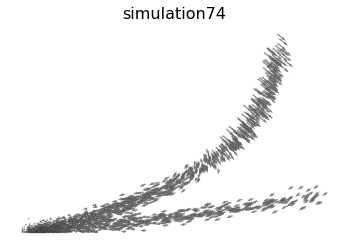

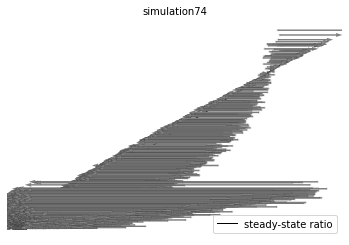

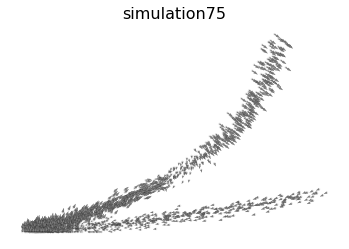

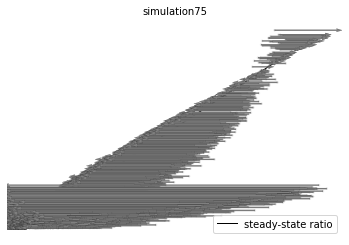

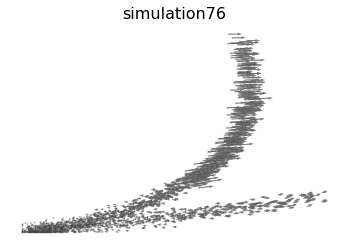

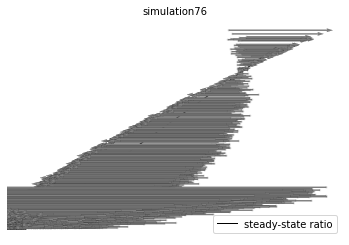

Error in callback <function flush_figures at 0x7fadd8101e60> (for post_execute):


KeyboardInterrupt: 

In [26]:
# %%capture
# Load the data

def pipline_run_sim_data(load_raw_data,name,ratio):

    # unsplice&splice
    splice_mat=load_raw_data.pivot(index='gene_name', values='splice', columns='cellID')
    unsplice_mat=load_raw_data.pivot(index='gene_name', values='unsplice', columns='cellID')

    one_gene_raw=load_raw_data[load_raw_data.gene_name==load_raw_data.gene_name[0]]

    cols=one_gene_raw['cellID']
    splice_mat = splice_mat[cols].T
    unsplice_mat = unsplice_mat[cols].T
    splice_mat.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/back_path/build_scv_compatible_raw/splice_'+ratio+'.csv')
    unsplice_mat.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/back_path/build_scv_compatible_raw/unsplice_'+ratio+'.csv')

    splice_mat=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/back_path/build_scv_compatible_raw/splice_'+ratio+'.csv')
    unsplice_mat=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/back_path/build_scv_compatible_raw/unsplice_'+ratio+'.csv')

    adata_building=sc.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/back_path/build_scv_compatible_raw/splice_'+ratio+'.csv', delimiter=',', first_column_names=True, dtype='float32')
    adata_building.layers['Ms']=splice_mat.to_numpy()[:,1:]
    adata_building.layers['Mu']=unsplice_mat.to_numpy()[:,1:]

    adata_building.layers['Ms']=np.array(adata_building.layers['Ms'], dtype=float)
    adata_building.layers['Mu']=np.array(adata_building.layers['Mu'], dtype=float)

    adata_building_test=adata_building.copy()
    # adata_building_test2=adata_building.copy()

    # velocity
    # scv.pp.moments(adata_building_test, n_pcs=30, n_neighbors=30)
    # scv.pp.moments(adata_building_test, n_pcs=50, n_neighbors=50)

    # steady_state_velocity
    scv.tl.velocity(adata_building_test, vkey='steady_state_velocity', mode='steady_state')
    scv.tl.velocity_graph(adata_building_test, vkey='steady_state_velocity')

    # dynamical_velocity
    scv.tl.recover_dynamics(adata_building_test, n_jobs=30, n_top_genes = 1000)
    scv.tl.velocity(adata_building_test, vkey='dynamical_velocity',mode='dynamical',filter_genes=False)
    
    # plot - steady_state_velocity
    gene_choice=load_raw_data['gene_name'].drop_duplicates()

    for gene in list(gene_choice)[0:3]:
        scv.pl.velocity_embedding(adata_building_test, vkey='steady_state_velocity', basis=gene,
                            scale=.6, width=.0035, frameon=False, title=gene,show=False)
        # plot- dynamical_velocity
        scv.pl.velocity_embedding(adata_building_test, vkey='dynamical_velocity', basis=gene, scale=4, width=.0035,
                            frameon=False, title=gene,show=False)
        
    adata_building_test.write(filename='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/back_path/build_scv_compatible_raw/backpath_'+ratio+'.h5ad')

    # gene velocity plot
    gene_choice=load_raw_data['gene_name'].drop_duplicates()
    # gene_choice=['simulation0','simulation1']

    outpath='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/back_path/velocity_result/scv'
    gene_splice_unsplice_splice_predict_unsplice_predict_dynamic_and_steady_df=pd.DataFrame()
    for nth,gene in enumerate(gene_choice):
        if nth % 100 ==0: print(nth)
        # dynamical_velocity
        outpath='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/back_path/velocity_result/scv'
        save_path=os.path.join(outpath,'scvelo_result',('back_path_'),(gene+'_dynamic.pdf'))
        X, V=scv.pl.velocity_embedding(adata_building_test, vkey='dynamical_velocity', basis=gene,
                            fontsize=16, frameon=False,show=False)
        splice_unsplice_splice_predict_unsplice_predict=np.concatenate((X, V), axis=1)

        # steady_state_velocity
        save_path=os.path.join(outpath,'scvelo_result',('back_path_'),(gene+'_static.pdf'))
        X_steady, V_steady=scv.pl.velocity_embedding(adata_building_test, vkey='steady_state_velocity', basis=gene,
                          scale=.6, width=.0035, frameon=False,show=False)
        splice_unsplice_splice_predict_unsplice_predict_steady=np.concatenate((X_steady, V_steady), axis=1)

        one_gene_splice_unsplice_splice_predict_unsplice_predict_dynamic_and_steady=np.hstack((splice_unsplice_splice_predict_unsplice_predict,splice_unsplice_splice_predict_unsplice_predict_steady))
        one_gene_splice_unsplice_splice_predict_unsplice_predict_dynamic_and_steady_df = pd.DataFrame(one_gene_splice_unsplice_splice_predict_unsplice_predict_dynamic_and_steady, columns = ['dynamic_splice','dynamic_unsplice','dynamic_splice_predict','dynamic_unsplice_predict','static_splice','static_unsplice','static_splice_predict','static_unsplice_predict'])
        one_gene_splice_unsplice_splice_predict_unsplice_predict_dynamic_and_steady_df.insert (0, "gene_name", gene)
        gene_splice_unsplice_splice_predict_unsplice_predict_dynamic_and_steady_df = pd.concat([gene_splice_unsplice_splice_predict_unsplice_predict_dynamic_and_steady_df,one_gene_splice_unsplice_splice_predict_unsplice_predict_dynamic_and_steady_df])
        
    gene_splice_unsplice_splice_predict_unsplice_predict_dynamic_and_steady_df.to_csv(os.path.join(outpath,'scvelo_result_back_path__splice_unsplice_splice_predict_unsplice_predict_dynamic_and_steady_df_'+ratio+'.csv'),index=False)


    #
if __name__ == "__main__":
    # raw_data_path='/Users/shengyuli/OneDrive - Houston Methodist/work/Velocity/data/velocyto/neuro/raw_data/denGyr_full_two_genes.csv'
    # load_raw_data=pd.read_csv(raw_data_path,names=['gene_name', 'unsplice','splice',"clusters",'cellID','embedding1','embedding2'])

    # load_raw_data_twogenes=load_raw_data[load_raw_data.gene_name.isin(['Rgs20','Gpm6b'])]
    # load_raw_data_twogenes.to_csv('/Users/shengyuli/OneDrive - Houston Methodist/work/Velocity/data/velocyto/neuro/raw_data/denGyr_full_two_genes.csv',index=False, header=True)
    # load_raw_data=pd.read_csv('/Users/shengyuli/OneDrive - Houston Methodist/work/Velocity/data/velocyto/neuro/raw_data/denGyr_full_two_genes.csv')
    ratio_list=[0.4,0.6,0.8,1]

    ratio_list=[0.8]

    for ratio in ratio_list:
        print(ratio)
        ratio=str(ratio)
        load_raw_data=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/back_path/raw/back_path_Path1Upper_1000__R'+ratio+'.csv')
        gene_list=list(load_raw_data.gene_name.drop_duplicates())
        load_raw_data=load_raw_data[load_raw_data.gene_name.isin(gene_list)]
        name='sim_back_path'
        pipline_run_sim_data(load_raw_data,name,ratio)
        
        ############
        # analysis #
        ############
        from analysis_SIM_compare_fun_notebook import *
        import sys
        srcdir = '/Users/wanglab/Documents/ShengyuLi/Velocity/bin/celldancer_polish/src'
        sys.path.append(srcdir)
        import celldancer.cdplt as cdplt
        
        analysis_result_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/back_path/analysis_result/'
        detail_input_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/back_path/velocity_result/celldancer/'
        raw_input_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/back_path/raw/'
        scv_result_input_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/back_path/velocity_result/scv/'
        foldername_para=''

        ########## scv
        # path: server
        print('running scv analysis')

        print(ratio)
        scVelo = get_similarity_scVelo(ratio,scv_result_input_path,raw_input_path,type='back',path='Path1Upper')
        scVelo.to_csv(analysis_result_path+'scvelo_similarity_eachCell'+str(ratio)+'.csv')
        sns.boxplot(x="ratio", y="similarity", hue='method', data=scVelo)